In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

figsize = (15,15)

In [2]:
import tpvalidator.basic as tvb
import tpvalidator.utilities as utils
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# data_path = "../data/vd/ide/tpgtree_st_mu_minus_vd_tpg_2_old.root"
data_path = "../data/vd/ide/tpgtree_st_mu_minus_vd_tpg_9.root"
mu_minus_vd_data = tvb.BasicTPData(data_path)

q_data = utils.load_data(data_path, 'triggerana/qtree')

/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/basic.py:200: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Particle origin: ({float(ev_row['startX']):.1f}, {float(ev_row['startY']):.1f}, {float(ev_row['startZ']):.1f})
/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: divide by zero encountered in dot
  vecw = np.dot(M, vec.data)
/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: overflow encountered in dot
  vecw = np.dot(M, vec.data)
/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: invalid value encountered in dot
  vecw = np.dot(M, vec.data)


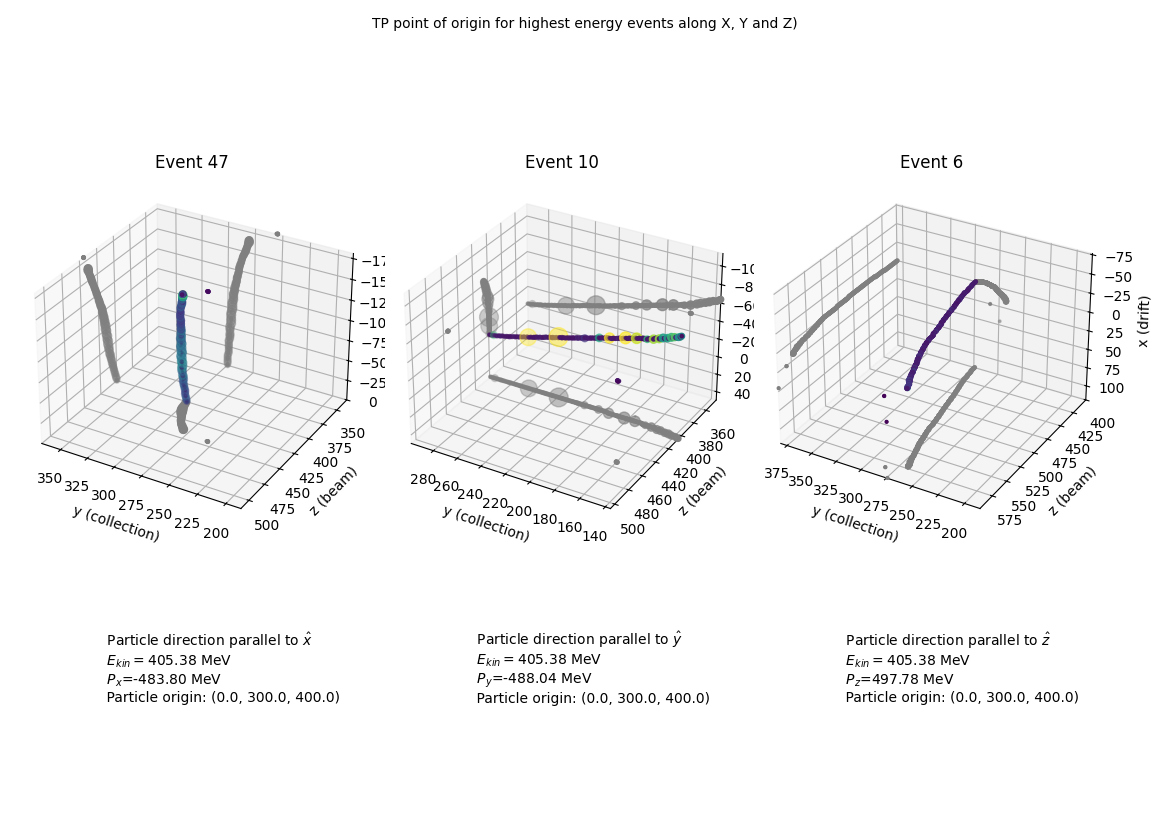

In [3]:
fig = tvb.plot_3dev_points_of_origin(mu_minus_vd_data)
fig.tight_layout()

In [4]:
q_data[(q_data['event'] == 213) & (q_data.z < 325) & (q_data.z > 300)]

event       run  subrun  nIDEs  channel    time  TrackId  \
entry subentry                                                             
212   4413        213  20000011       0   9010    18321  3836.0        1   
      4414        213  20000011       0   9010    18321  3837.0        1   
      4415        213  20000011       0   9010    18321  3838.0        1   
      4416        213  20000011       0   9010    18321  3839.0       -1   
      4417        213  20000011       0   9010    18321  3840.0        1   
...               ...       ...     ...    ...      ...     ...      ...   
      7220        213  20000011       0   9010    18766  3910.0       -1   
      7221        213  20000011       0   9010    18766  3911.0       -1   
      7222        213  20000011       0   9010    18766  3912.0       -1   
      7223        213  20000011       0   9010    18766  3913.0       -1   
      7224        213  20000011       0   9010    18766  3914.0       -1   

                 nElectrons    energy          x           y           z  
entry subentry                                                            
212   4413      1891.966309  0.087516  17.252615  325.135834  300.019135  
      4414       871.965149  0.040314  17.213930  325.099915  300.174683  
      4415       327.329651  0.015002  17.161966  325.050842  300.386444  
      4416       100.317719  0.004517  17.102432  324.993652  300.630676  
      4417        13.174105  0.000674  17.034826  324.920227  300.902008  
...                     ...       ...        ...         ...         ...  
      7220       180.682388  0.007497  10.938767  317.656494  324.675323  
      7221       676.889954  0.027671  10.878488  317.622864  324.794708  
      7222      2048.904541  0.083207  10.843421  317.596741  324.878845  
      7223      4662.024902  0.189005  10.822665  317.576630  324.943085  
      7224      7593.910156  0.308578  10.808177  317.559570  324.998749  

[1207 rows x 12 columns]

In [5]:
mu = mu_minus_vd_data

/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/basic.py:156: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tps = tps[tp_data.tps.TP_signal == is_signal]
/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: divide by zero encountered in dot
  vecw = np.dot(M, vec.data)
/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: overflow encountered in dot
  vecw = np.dot(M, vec.data)
/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: invalid value encountered in dot
  vecw = np.dot(M, vec.data)


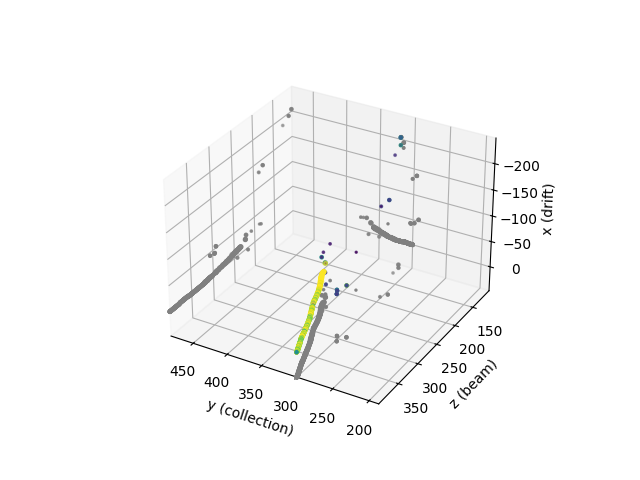

In [6]:
import tpvalidator.basic as basic


fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
basic.draw_tps_point_of_origin(ax, mu, 208, is_signal=True)

In [7]:
import awkward as ak
import numpy as np
import uproot
f = uproot.open("../data/vd/trigger_digits_waves_mu_minus_vd_detsim_0.root")
t = f['triggerana/rawdigis_tree']
df_evs = t.arrays(["event", "run", "subrun", "chans_with_electrons"], library='pd')

ev_num = df_evs.event[0]

chans = ([ c for c in df_evs[df_evs.event == ev_num].chans_with_electrons[0]])


arrays = t.arrays([str(c) for c in chans])
waves = ak.to_dataframe(arrays)
waves.columns = [int(c) for c in waves.columns]
waves.index = np.arange(0, len(waves))
waves['event'] = ev_num


In [8]:
waves['event'] = ev_num

In [9]:
(waves.event == 32).any()

np.False_

Plane 0
TP start-end: 4057-4064
TP peak: 129.0
[]
Plane 1
TP start-end: 4240-4245
TP peak: 78.0
[]
Plane 2
TP start-end: 4164-4213
TP peak: 520.0
[]


,event,n_TPs,TP_channel,TP_startT,TP_peakT,TP_peakADC,TP_SADC,TP_TOT,TP_plane,TP_TPC,TP_trueX,TP_trueY,TP_trueZ,TP_signal
"[entry, subentry]",,,,,,,,,,,,,,
0,47.0,224.0,18359.0,4057.0,4061.0,129.0,657.0,7.0,0.0,21.0,-1.0,300.0,400.0,1.0
1,47.0,224.0,18539.0,4240.0,4242.0,78.0,346.0,5.0,1.0,21.0,-15.0,300.0,403.0,1.0
2,47.0,224.0,18918.0,4164.0,4190.0,520.0,13194.0,49.0,2.0,21.0,-10.0,300.0,402.0,1.0


|   entry |   subentry |   event |   n_TPs |   TP_channel |   TP_startT |   TP_peakT |   TP_peakADC |   TP_SADC |   TP_TOT |   TP_plane |   TP_TPC |   TP_trueX |   TP_trueY |   TP_trueZ |
|--------:|-----------:|--------:|--------:|-------------:|------------:|-----------:|-------------:|----------:|---------:|-----------:|---------:|-----------:|-----------:|-----------:|
|       0 |         47 |     224 |   18359 |         4057 |        4061 |        129 |          657 |         7 |        0 |         21 |       -1 |        300 |        400 |          1 |
|       1 |         47 |     224 |   18539 |         4240 |        4242 |         78 |          346 |         5 |        1 |         21 |      -15 |        300 |        403 |          1 |
|       2 |         47 |     224 |   18918 |         4164 |        4190 |        520 |        13194 |        49 |        2 |         21 |      -10 |        300 |        402 |          1 |


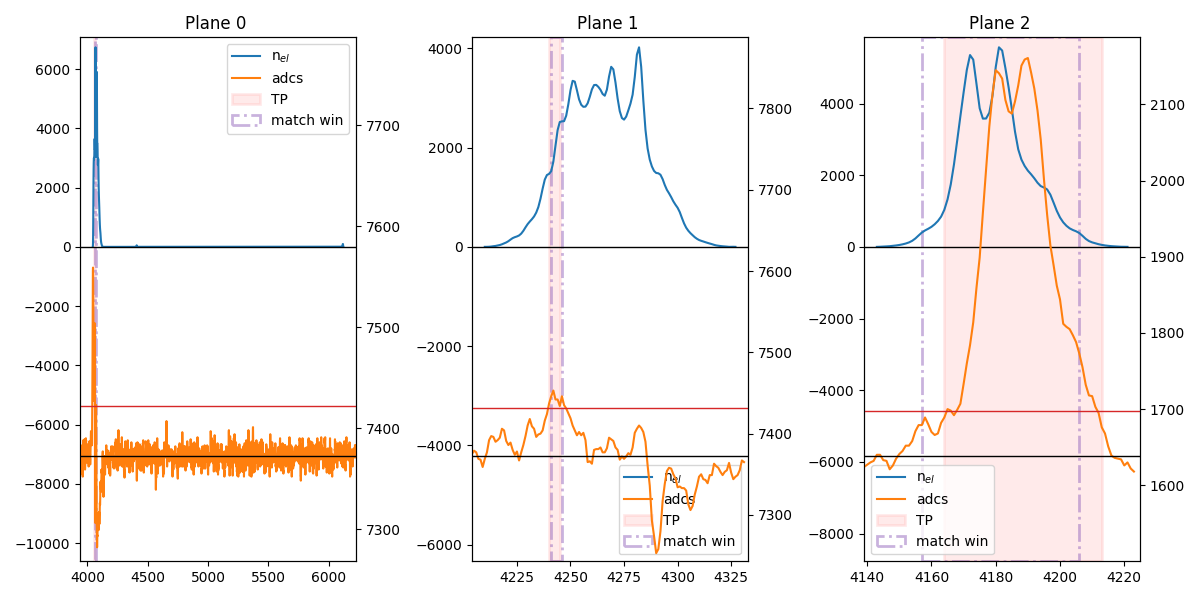

In [ ]:
# Uses 
# - tp_data
# - q_data
# Add
# - raw waveforms
import matplotlib

def plot_3_tps_and_ides_from_event(ev_num: int, tp_idx: list = [0,0,0], thres=[50, 60, 60]):
    inspect_tps = mu.tps[(mu.tps.event == ev_num)  & (mu.tps.TP_signal == True) & (mu.tps.TP_SADC > 1e2)]
    offsets = [+8,+1,-7]

    fig, axes = plt.subplots(1,3, figsize=(12,6))

    selected_tps = inspect_tps.iloc[:0].copy()

    # Color selection
    colors = matplotlib.colormaps['tab20'].colors
    ide_color = colors[0]
    wave_color = colors[2]
    thres_color = colors[6]
    tp_color = colors[7]
    match_color = colors[8]


    for p in range(3):
        print(f"Plane {p}")
        ax = axes[p]
        plots = []
        
        inspect_tps_plane = inspect_tps[inspect_tps.TP_plane == p].reset_index()
        if len(inspect_tps_plane) == 0:
            continue

        tp = inspect_tps_plane.loc[tp_idx[p]]
        selected_tps.loc[len(selected_tps)] = tp
        # print(tp)

        ch_id = int(tp.TP_channel)

        tp_start, tp_end = int(tp.TP_startT), int(tp.TP_startT+tp.TP_TOT)
        print(f"TP start-end: {tp_start}-{tp_end}")
        print(f"TP peak: {tp.TP_peakADC}")

        # Plot IDE data
        q_ch = q_data[(q_data['event'] == ev_num) & (q_data.channel == ch_id)]
        # q_ch.plot(x='time', y='nElectrons', ax=ax)
        lns = ax.plot(q_ch.time, q_ch.nElectrons, label='n$_{el}$', color=ide_color)

        ax.axhline(y=0, color='black', linewidth=1)

        xmin, xmax = ax.get_xlim()
        ax.set_xlim(min(xmin, tp_start), max(xmax, tp_end))

        if ((waves.event == ev_num).any()):

            from mpl_axes_aligner import shift
            shift.yaxis(ax, 0, 0.6, True)
            
            wf = waves[ch_id]
            xmin, xmax = ax.get_xlim()
            ax_2 = ax.twinx()

            wf_zoom = wf.iloc[int(xmin):int(xmax)]
            lns += ax_2.plot(wf_zoom.index, wf_zoom.values, label="adcs", color=wave_color)

            ax_2.axhline(y=wf.mean(), color='black', linewidth=1)
            ax_2.axhline(y=wf.mean()+thres[p], color=thres_color, linewidth=1)

            shift.yaxis(ax_2, wf.mean(), 0.2, True)

        ymin, ymax = ax.get_ylim()

        rect_tp = patches.Rectangle((tp.TP_startT, ymin), tp.TP_TOT, ymax-ymin,
                                linewidth=2, edgecolor=tp_color, facecolor=tp_color, alpha=0.2)
        ax.add_patch(rect_tp)
        rect_match = patches.Rectangle((tp.TP_startT+offsets[p], ymin), tp.TP_TOT, ymax-ymin,
                                linewidth=2, edgecolor=match_color, fill=False, linestyle='-.', alpha=0.5)
        ax.add_patch(rect_match)

        print(plots)

        ax.legend(lns+[rect_tp, rect_match], [l.get_label() for l in lns]+['TP', 'match win'], loc=0)

        ax.set_title(f"Plane {p} ")


    display(selected_tps)
    fig.tight_layout()
    return selected_tps


ev_num = 47
tp_idx = [4,5,6]

df_sel_tps = plot_3_tps_and_ides_from_event(ev_num, tp_idx)
print(df_sel_tps.to_markdown())

In [76]:
waves[18325].values

array([7376, 7362, 7365, ..., 7359, 7375, 7378],
      shape=(8500,), dtype=int16)

In [11]:
mu.mc[(mu.mc.detQ_U / mu.mc.totQ_U) <  0.2]

,,event,Eng,Ekin,startX,startY,startZ,Px,Py,Pz,P,totQ_X,totQ_U,totQ_V,detQ_X,detQ_U,detQ_V
entry,subentry,,,,,,,,,,,,,,,,
46,0,47,0.511042,405.383698,0.0,300.0,400.0,-0.483797,0.039365,0.119961,0.5,9028237.0,9032566.0,9033291.0,8633923.0,1446880.125,2714664.000
71,0,72,0.511042,405.383698,0.0,300.0,400.0,-0.484469,-0.111517,0.053417,0.5,9167854.0,9173453.0,9173740.0,8402681.0,1636328.500,2325824.500
141,0,142,0.511042,405.383698,0.0,300.0,400.0,-0.399203,-0.161058,0.254356,0.5,9407453.0,9412445.0,9412468.0,9131337.0,1869103.375,7288547.000
181,0,182,0.511042,405.383698,0.0,300.0,400.0,-0.464949,0.058285,-0.174430,0.5,8940100.0,8945342.0,8944854.0,8606288.0,1333281.875,4383451.000
300,0,301,0.511042,405.383698,0.0,300.0,400.0,-0.466687,0.025754,-0.177595,0.5,9068300.0,9073290.0,9073437.0,8704687.0,1608952.125,2077096.125
353,0,354,0.511042,405.383698,0.0,300.0,400.0,-0.395431,-0.200995,0.230728,0.5,9102880.0,9107096.0,9107615.0,8895992.0,1524707.375,6602596.000
392,0,393,0.511042,405.383698,0.0,300.0,400.0,-0.489958,-0.015003,0.098569,0.5,9049151.0,9054671.0,9054233.0,8626624.0,1414981.500,1362653.875
414,0,415,0.511042,405.383698,0.0,300.0,400.0,0.498537,-0.006101,-0.037729,0.5,10274057.0,10276292.0,10277322.0,9470425.0,2043560.375,1954893.375
467,0,468,0.511042,405.383698,0.0,300.0,400.0,-0.458983,0.063289,-0.187960,0.5,9183084.0,9188800.0,9188516.0,8884577.0,1518257.000,4883016.000


In [12]:
mu.angles[mu.angles.event.isin(list(mu.mc[(mu.mc.detQ_U / mu.mc.totQ_U) <  0.2].event))]

,,event,theta_y,theta_yU,theta_yV,theta_xz,theta_xzU,theta_xzV,theta_drift,theta_beam,theta_coll,theta_u,theta_v,phi_coll,phi_ind_u,phi_ind_v
entry,subentry,,,,,,,,,,,,,,,
46,0,47,85.484428,77.964600,94.795227,76.073944,81.627029,76.166107,165.373932,76.118042,85.484428,80.304382,75.691437,166.073944,168.996445,176.936829
71,0,72,102.887321,96.425331,104.003548,83.708008,77.177788,93.013985,165.682098,83.867119,102.887321,78.226761,91.088432,173.707993,171.793625,165.722672
141,0,142,108.790901,86.896873,124.418678,57.496346,53.089916,75.431717,142.978195,59.421879,108.790901,53.014290,73.769608,147.496338,178.234909,146.258011
181,0,182,83.305794,96.885803,72.250641,110.564034,110.503128,102.479568,158.418762,110.417564,83.305794,111.125145,104.113052,159.435944,175.482086,163.503708
300,0,301,87.047447,100.099701,75.102470,110.834061,108.546669,105.019371,158.966965,110.805122,87.047447,109.472748,106.370621,159.165924,171.891052,166.609146
353,0,354,113.702652,92.177963,126.858238,59.737041,52.319637,81.274300,142.266083,62.518871,113.702652,53.085098,78.542686,149.737045,171.555939,143.798157
392,0,393,91.719521,84.479355,98.268753,78.625107,79.893303,81.976181,168.497574,78.630302,91.719521,79.296265,81.041222,168.625107,175.763809,172.756027
414,0,415,90.699081,93.188179,87.922234,94.327835,93.010460,93.861008,4.383829,94.327507,90.699081,93.396629,94.097206,4.327841,2.773067,1.560471
467,0,468,82.728104,97.378593,70.775696,112.269844,112.236313,103.547096,156.630493,112.081238,82.728104,112.882713,105.204681,157.730148,175.122086,162.038681


Plane 0
TP start-end: 6357-6360
TP peak: 74.0
Plane 1
TP start-end: 6594-6602
TP peak: 110.0
Plane 2
TP start-end: 6370-6377
TP peak: 105.0


/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/basic.py:156: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tps = tps[tp_data.tps.TP_signal == is_signal]


,event,n_TPs,TP_channel,TP_startT,TP_peakT,TP_peakADC,TP_SADC,TP_TOT,TP_plane,TP_TPC,TP_trueX,TP_trueY,TP_trueZ,TP_signal
"[entry, subentry]",,,,,,,,,,,,,,
0,208.0,615.0,4570.0,6357.0,6358.0,74.0,206.0,3.0,0.0,5.0,-185.0,316.0,126.0,1.0
1,208.0,615.0,4690.0,6594.0,6598.0,110.0,774.0,8.0,1.0,5.0,-204.0,320.0,103.0,1.0
2,208.0,615.0,5138.0,6370.0,6373.0,105.0,599.0,7.0,2.0,5.0,-185.0,316.0,126.0,1.0


|   entry |   subentry |   event |   n_TPs |   TP_channel |   TP_startT |   TP_peakT |   TP_peakADC |   TP_SADC |   TP_TOT |   TP_plane |   TP_TPC |   TP_trueX |   TP_trueY |   TP_trueZ |
|--------:|-----------:|--------:|--------:|-------------:|------------:|-----------:|-------------:|----------:|---------:|-----------:|---------:|-----------:|-----------:|-----------:|
|       0 |        208 |     615 |    4570 |         6357 |        6358 |         74 |          206 |         3 |        0 |          5 |     -185 |        316 |        126 |          1 |
|       1 |        208 |     615 |    4690 |         6594 |        6598 |        110 |          774 |         8 |        1 |          5 |     -204 |        320 |        103 |          1 |
|       2 |        208 |     615 |    5138 |         6370 |        6373 |        105 |          599 |         7 |        2 |          5 |     -185 |        316 |        126 |          1 |
|          |   event |      Eng |    Ekin |   startX |   sta

/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: divide by zero encountered in dot
  vecw = np.dot(M, vec.data)
/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: overflow encountered in dot
  vecw = np.dot(M, vec.data)
/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: invalid value encountered in dot
  vecw = np.dot(M, vec.data)


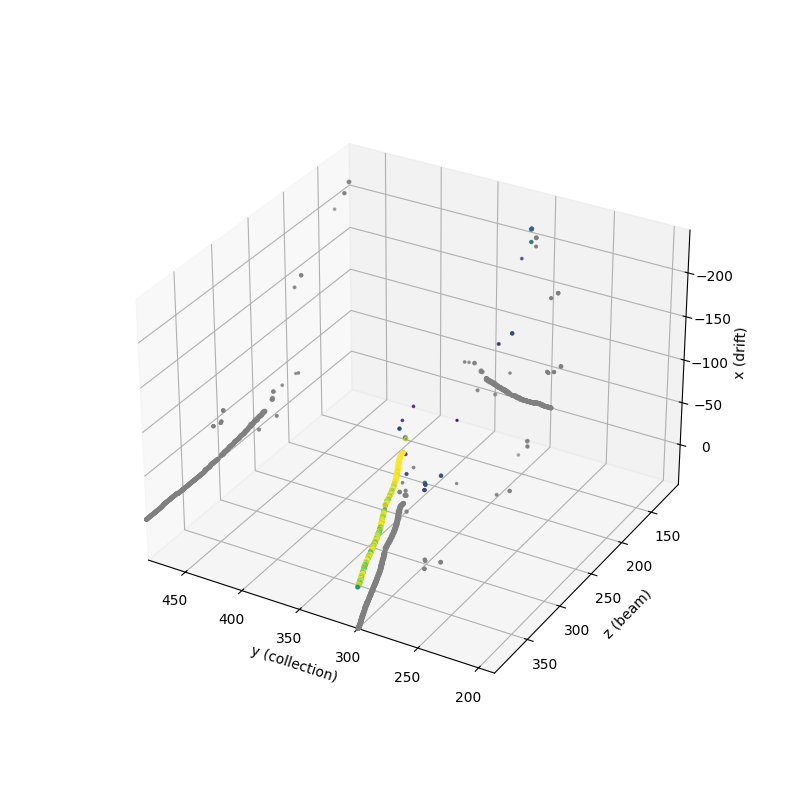

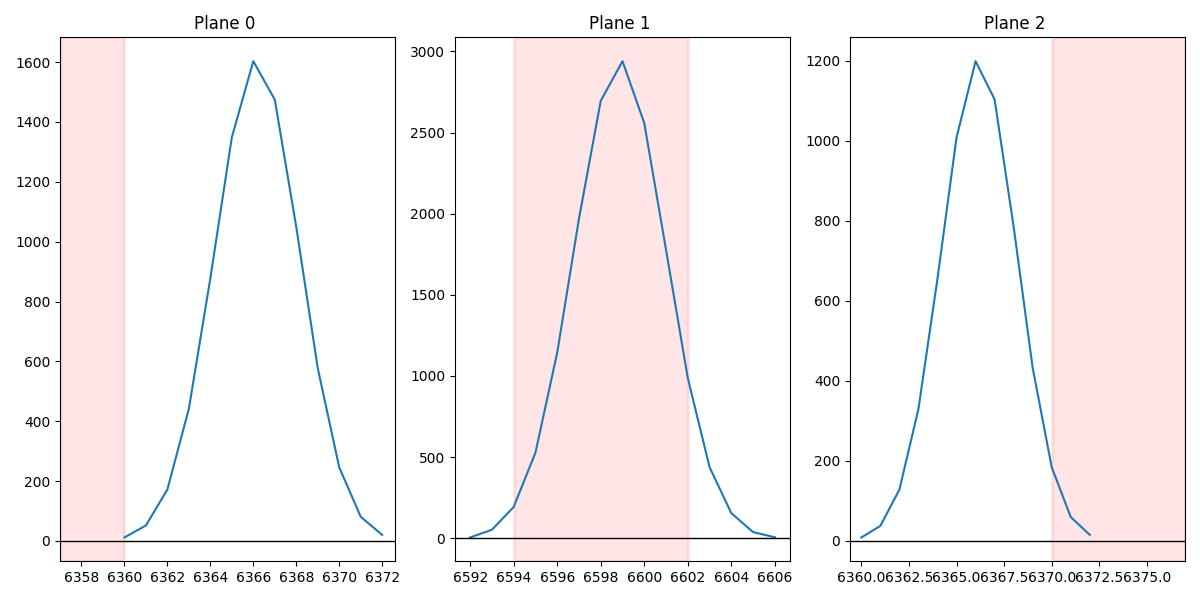

In [31]:
ev_num = 208

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8,8))
basic.draw_tps_point_of_origin(ax, mu, ev_num, is_signal=True)

tp_idx = [4,0,4]


df_sel_tps = plot_3_tps_and_ides_from_event(ev_num, tp_idx)
print(df_sel_tps.to_markdown())
print(mu.mc[mu.mc.event == ev_num].to_markdown())

In [14]:
mu.mc[mu.mc.event == ev_num]

,,event,Eng,Ekin,startX,startY,startZ,Px,Py,Pz,P,totQ_X,totQ_U,totQ_V,detQ_X,detQ_U,detQ_V
entry,subentry,,,,,,,,,,,,,,,,
207,0,208,0.511042,405.383698,0.0,300.0,400.0,-0.053164,0.179551,-0.463611,0.5,9771754.0,9782974.0,9775734.0,9663923.0,9234784.0,9626149.0


Plane 0
TP start-end: 4619-4622
TP peak: 81.0
Plane 1
TP start-end: 5404-5406
TP peak: 73.0
Plane 2
TP start-end: 5723-5763
TP peak: 382.0


,event,n_TPs,TP_channel,TP_startT,TP_peakT,TP_peakADC,TP_SADC,TP_TOT,TP_plane,TP_TPC,TP_trueX,TP_trueY,TP_trueZ,TP_signal
"[entry, subentry]",,,,,,,,,,,,,,
0,47.0,224.0,18364.0,4619.0,4620.0,81.0,222.0,3.0,0.0,21.0,-46.0,298.0,410.0,1.0
1,47.0,224.0,18558.0,5404.0,5405.0,73.0,139.0,2.0,1.0,21.0,-108.0,293.0,421.0,1.0
2,47.0,224.0,18971.0,5723.0,5743.0,382.0,8526.0,40.0,2.0,21.0,-135.0,288.0,429.0,1.0


|   entry |   subentry |   event |   n_TPs |   TP_channel |   TP_startT |   TP_peakT |   TP_peakADC |   TP_SADC |   TP_TOT |   TP_plane |   TP_TPC |   TP_trueX |   TP_trueY |   TP_trueZ |
|--------:|-----------:|--------:|--------:|-------------:|------------:|-----------:|-------------:|----------:|---------:|-----------:|---------:|-----------:|-----------:|-----------:|
|       0 |         47 |     224 |   18364 |         4619 |        4620 |         81 |          222 |         3 |        0 |         21 |      -46 |        298 |        410 |          1 |
|       1 |         47 |     224 |   18558 |         5404 |        5405 |         73 |          139 |         2 |        1 |         21 |     -108 |        293 |        421 |          1 |
|       2 |         47 |     224 |   18971 |         5723 |        5743 |        382 |         8526 |        40 |        2 |         21 |     -135 |        288 |        429 |          1 |
|         |   event |      Eng |    Ekin |   startX |   star

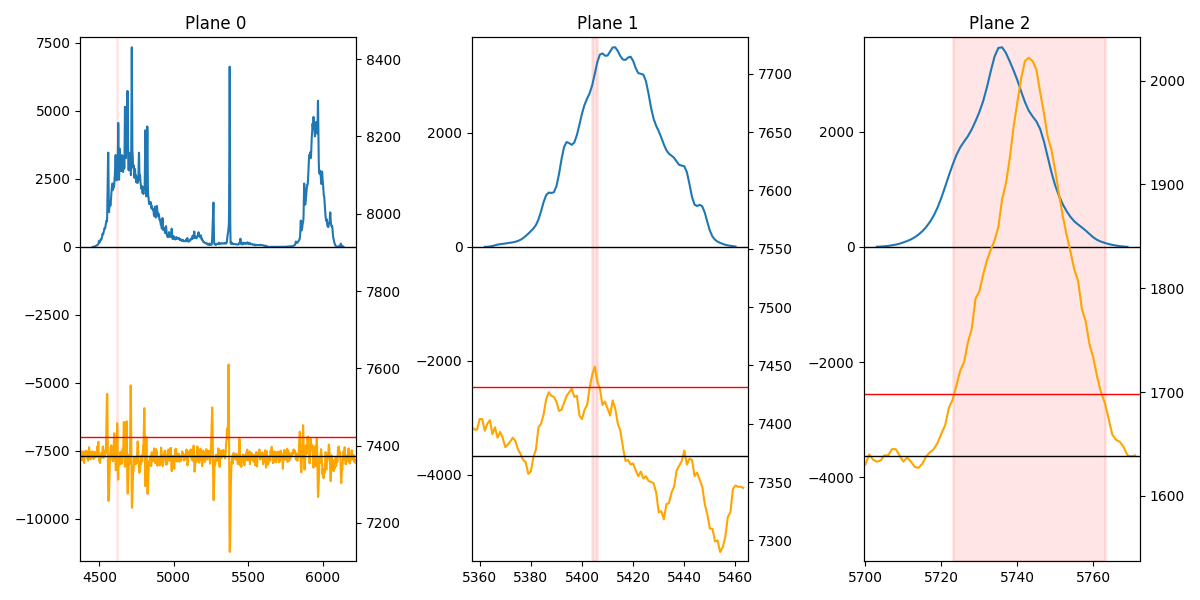

In [32]:
ev_num = 47

# fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8,8))
# basic.draw_tps_point_of_origin(ax, mu, ev_num, is_signal=True)

tp_idx = [20,33,65]

df_sel_tps = plot_3_tps_and_ides_from_event(ev_num, tp_idx)
print(df_sel_tps.to_markdown())
print(mu.mc[mu.mc.event == ev_num].to_markdown())

In [16]:
ide_chans = set(c for c in q_data[q_data.event == ev_num].channel.unique())
raw_chans  = set( int(c) for c in chans)

len(ide_chans)
len(raw_chans)
len(raw_chans.intersection(ide_chans))

242

/var/folders/dw/sj94s2457kl2gkb829ty4_cc0000gn/T/ipykernel_62216/385622926.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


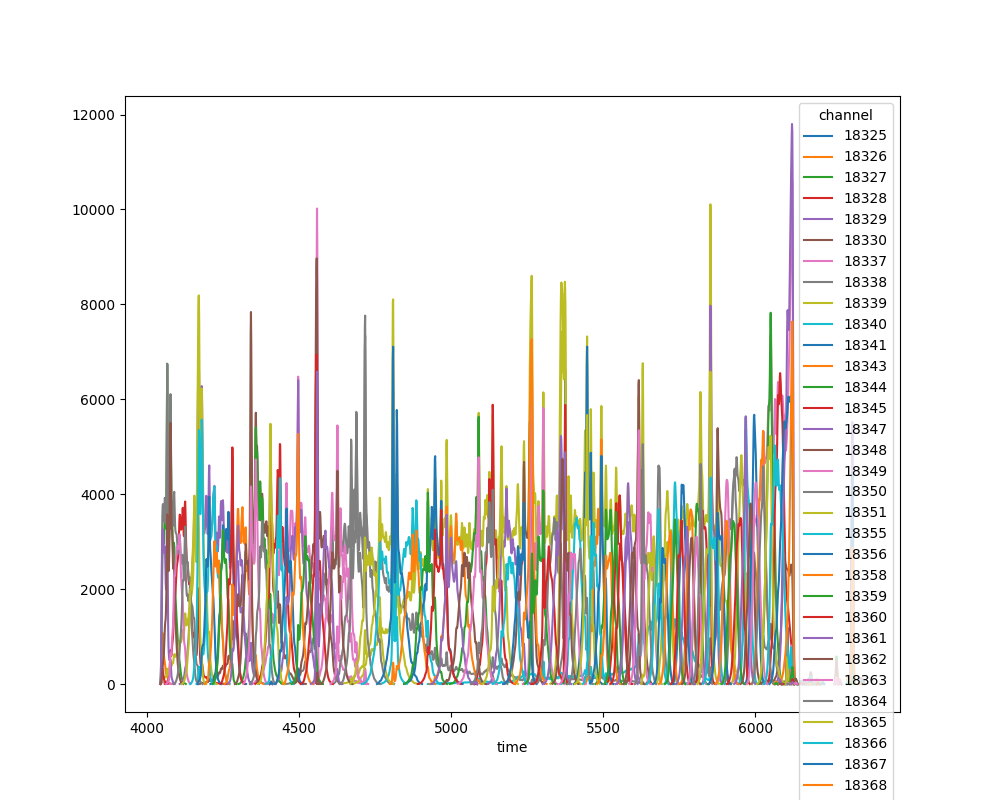

In [17]:
x = q_data[q_data.event == 47].copy()
y = x[['time', 'nElectrons', 'channel']]
df_pivoted = y.pivot(index='time', columns='channel', values='nElectrons')

df_pivoted.plot(figsize=(10,8))
plt.tight_layout()

In [18]:
df[[18536]].plot()

NameError: name 'df' is not defined

<Axes: xlabel='time'>

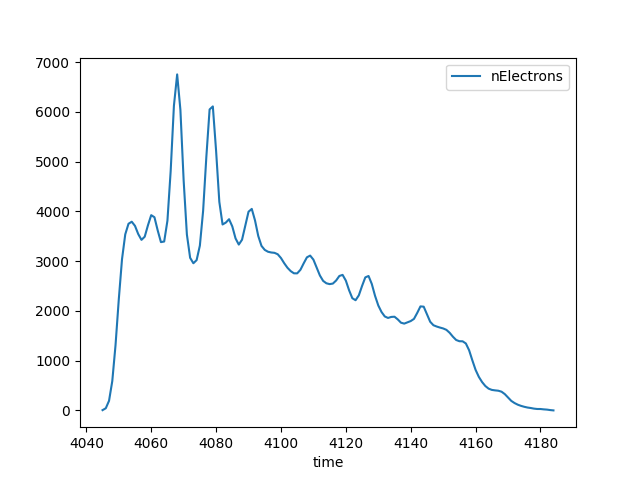

In [ ]:
x[x.channel == 18536].reset_index().plot(x='time', y='nElectrons')

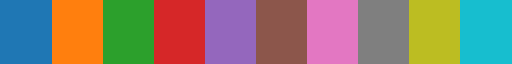

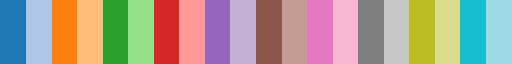

In [42]:
import matplotlib
cmap = matplotlib.colormaps['tab10']

display(cmap)
cmap = matplotlib.colormaps['tab20']
display(cmap)
